

You will need to install vaderSentiment library since you most likely have not worked with it before. 

How about ast? It's surprise tool to help us later.

In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

### Step 2: Read the CSV from Part III
Next up, let's read the CSV that you exported from Part III. 

In [2]:
df = pd.read_csv('speechDF3.csv')
df.head()

,filename,name,year,speech,len_speech,sentences,num_sentences,average_sen_length,SMOG_index,Flesch_score,NOUN_count,VERB_count,noun_to_verb
0,obama2010.txt,obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"['Madam Speaker, Vice President Biden, members...",562,77.754448,17.826429,24.720575,1928,1442,1.337032
1,obama2011.txt,obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"['Mr', ' Speaker, Mr', ' Vice President, membe...",500,82.046000,16.543303,32.322806,1856,1329,1.396539
2,obama2012.txt,obama,2012,"Mr. Speaker, Mr. Vice President, members of C...",42204,"[' Mr', ' Speaker, Mr', ' Vice President, memb...",518,81.474903,17.344065,26.228014,1956,1331,1.469572
3,obama2013.txt,obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41202,"['Mr', ' Speaker, Mr', ' Vice President, membe...",455,90.553846,14.187551,52.062427,1930,1249,1.545236
4,obama2014.txt,obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",352,113.661932,19.064501,9.227649,1908,1284,1.485981


### Step 3: Turn the values in 'sentences' column back into a list
The downside of exporting a DataFrame containing a list is that when you read the CSV back into a DataFrame, the entire list becomes a string, i.e.

"['a', 'b', 'c']" rather than ['a', 'b', 'c']

In fact, you can try using type() on one of the values in the 'sentences' column to see what we mean.

This poses an issue later because we want to work with the lists. As such, we will have to convert the values back into a list. 

Sounds daunting? Fret not. 

<strong>Hint: Google "turn string list into list python"</strong>
    
<strong>Hint 2: Google "apply a function to every row in a pandas dataframe"</strong>

In [3]:
# Step 3: Turn your string list into a list back
df['sentences'] = df.apply(lambda row : row['sentences'].strip('][').split(', '), axis = 1)

In [4]:
df.head()

,filename,name,year,speech,len_speech,sentences,num_sentences,average_sen_length,SMOG_index,Flesch_score,NOUN_count,VERB_count,noun_to_verb
0,obama2010.txt,obama,2010,"Madam Speaker, Vice President Biden, members o...",43698,"['Madam Speaker, Vice President Biden, members...",562,77.754448,17.826429,24.720575,1928,1442,1.337032
1,obama2011.txt,obama,2011,"Mr. Speaker, Mr. Vice President, members of Co...",41023,"['Mr', ' Speaker, Mr', ' Vice President, membe...",500,82.046000,16.543303,32.322806,1856,1329,1.396539
2,obama2012.txt,obama,2012,"Mr. Speaker, Mr. Vice President, members of C...",42204,"[' Mr', ' Speaker, Mr', ' Vice President, memb...",518,81.474903,17.344065,26.228014,1956,1331,1.469572
3,obama2013.txt,obama,2013,"Mr. Speaker, Mr. Vice President, members of Co...",41202,"['Mr', ' Speaker, Mr', ' Vice President, membe...",455,90.553846,14.187551,52.062427,1930,1249,1.545236
4,obama2014.txt,obama,2014,"Mr. Speaker, Mr. Vice President, Members of Co...",40009,"['Mr', ' Speaker, Mr', ' Vice President, Membe...",352,113.661932,19.064501,9.227649,1908,1284,1.485981


## Analyze the sentiment of Obama's 2010 speech
Before we analyze all of the speeches, we'll start with Obama's 2010 speech first. 

<strong>Hint: Google "create dataframe from list"</strong>

In [5]:
df['sentences'] = df['speech'].str.split(pat = ".")

In [6]:
dl = pd.DataFrame(df['sentences'][0])
dl

,0
0,"Madam Speaker, Vice President Biden, members o..."
1,"For 220 years, our leaders have fulfilled thi..."
2,They've done so during periods of prosperity ...
3,And they've done so in the midst of war and d...
4,\n\nIt's tempting to look back on these moment...
5,But when the Union was turned back at Bull Ru...
6,"When the market crashed on Black Tuesday, and..."
7,These were the times that tested the courage ...
8,And despite all our divisions and disagreemen...
9,"\n\nAgain, we are tested"


### Step 5: Calculate the sentiment score for each row
You will have to calculate the sentiment score for each row, and take only 'compound' score for the sentence.

Best resource: https://github.com/cjhutto/vaderSentiment#python-demo-and-code-examples

The code example in the library's documentation will get your started.

Note: the output of the SentimentAnalyzer from vaderSentiment library is a dictonary containing four keys
1. pos
2. neu
3. neg
4. compound

You will need to pick only the 'compound' key to get the score. 

In [7]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\daani\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [8]:
dl.head()
dl.columns = ['sentence']
dl.head()

,sentence
0,"Madam Speaker, Vice President Biden, members o..."
1,"For 220 years, our leaders have fulfilled thi..."
2,They've done so during periods of prosperity ...
3,And they've done so in the midst of war and d...
4,\n\nIt's tempting to look back on these moment...


In [9]:
# Step 5: Get the compound score of each row's sentence
compound = []
analyzer = SentimentIntensityAnalyzer()
for sentence in dl['sentence']:
    vs = analyzer.polarity_scores(sentence)
    compound.append(vs['compound'])

In [10]:
dl['compound'] = compound

In [11]:
dl.head()

,sentence,compound
0,"Madam Speaker, Vice President Biden, members o...",0.0000
1,"For 220 years, our leaders have fulfilled thi...",0.4215
2,They've done so during periods of prosperity ...,0.4215
3,And they've done so in the midst of war and d...,-0.1779
4,\n\nIt's tempting to look back on these moment...,0.7184


In [12]:
# Step 6: Create the index column
c = []
for i in range(0,len(dl)):
    c.append(i)
dl['index'] = c

In [13]:
dl = dl[['index','sentence','compound']]

In [14]:
dl

,index,sentence,compound
0,0,"Madam Speaker, Vice President Biden, members o...",0.0000
1,1,"For 220 years, our leaders have fulfilled thi...",0.4215
2,2,They've done so during periods of prosperity ...,0.4215
3,3,And they've done so in the midst of war and d...,-0.1779
4,4,\n\nIt's tempting to look back on these moment...,0.7184
5,5,But when the Union was turned back at Bull Ru...,-0.4144
6,6,"When the market crashed on Black Tuesday, and...",-0.0516
7,7,These were the times that tested the courage ...,0.7506
8,8,And despite all our divisions and disagreemen...,-0.7717
9,9,"\n\nAgain, we are tested",0.0000


### Step 7: Normalize the values in the index column
Normalization means bringing your set of values to be between 0 and 1. 

To do that, you'll have to divide all of the values in your column with the largest number, i.e. the last value in the column.

In [15]:
dl['index'] = dl['index'] / 561

In [16]:
dl

,index,sentence,compound
0,0.000000,"Madam Speaker, Vice President Biden, members o...",0.0000
1,0.001783,"For 220 years, our leaders have fulfilled thi...",0.4215
2,0.003565,They've done so during periods of prosperity ...,0.4215
3,0.005348,And they've done so in the midst of war and d...,-0.1779
4,0.007130,\n\nIt's tempting to look back on these moment...,0.7184
5,0.008913,But when the Union was turned back at Bull Ru...,-0.4144
6,0.010695,"When the market crashed on Black Tuesday, and...",-0.0516
7,0.012478,These were the times that tested the courage ...,0.7506
8,0.014260,And despite all our divisions and disagreemen...,-0.7717
9,0.016043,"\n\nAgain, we are tested",0.0000


### Step 8: Plot 'index' against 'compound'
Let's see how the sentiment score varies across the speech.

Plot index vs compound for Obama's 2010 speech.

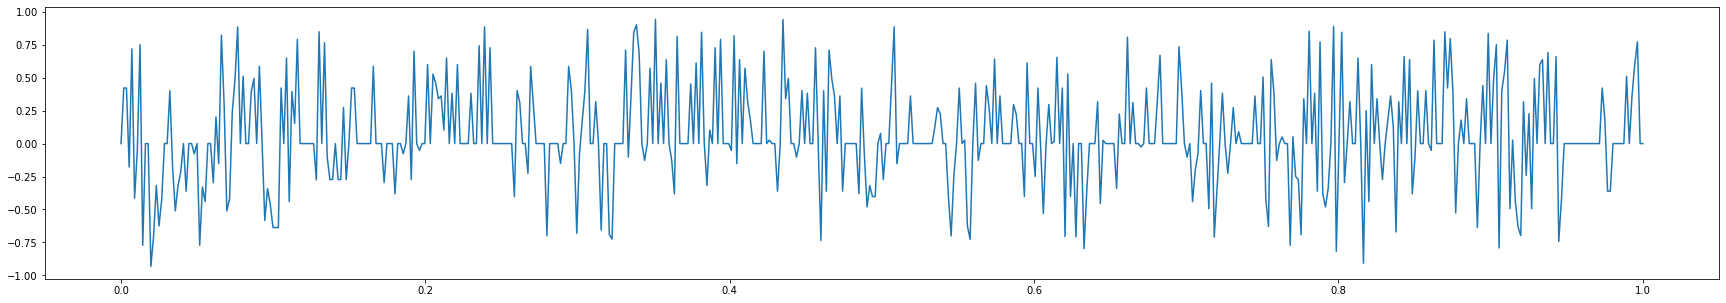

In [17]:
# Step 8: Plot index vs compound
plt.figure(figsize=(30, 5))
plt.plot(dl['index'], dl['compound'])

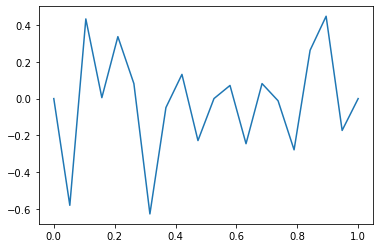

In [18]:
# Step 9: Plot an interpolated smooth curve for Obama's 2010 speech
from scipy.interpolate import make_interp_spline, BSpline
from scipy.interpolate import interp1d


#create data
x = np.array(dl['index'])
y = np.array(dl['compound'])

#define x as 200 equally spaced values between the min and max of original x 
x_new = np.linspace(x.min(), x.max(),20)

f = interp1d(x, y, kind='quadratic')
y_smooth=f(x_new)

plt.plot (x_new,y_smooth)

## Plotting all of the curves
Now that you've figured out how to process one year's data, it's time to create a loop to process the rest. Basically, repeat Steps 4-9 for the rest of the speeches. 
### Step 10: Create a list of processed DataFrames
We will loop through the 'sentences' column, and perform the same operations on each sentence. 

Here's roughly what you'll have to do:
1. Create a empty list
2. Use a for loop to loop through the 'sentences' column
3. In each loop
    1. Create a SentimentIntensityAnalyzer object
    2. Create a DataFrame using the current value in the 'sentences' column, with a column named 'sentence'
    3. Reset the index to get a new column named 'index'
    4. Divide the values in the 'index' column with the maximum value of the 'index' column
    5. Create an empty list
    6. Use a for loop to loop through 'sentence' column in the DataFrame from B
    7. In each loop
        1. Append the compound score of the sentence in the empty list in E
    8. Set the list of compound scores as a new column in the DataFrame from B
    9. Append the DataFrame from B into the empty list at 1

In [21]:
# Step 10: Create a list of processed DataFrames
u = []
o = [561, 499, 517, 454, 351, 465, 304, 322, 297, 556]
for i in range(0,10):
    dt = pd.DataFrame(df['sentences'][i])
    dt.columns = ['sentence']
    q = []
    for sentence in dt['sentence']:
        b = analyzer.polarity_scores(sentence)
        q.append(b['compound'])
    dt['compound'] = q
    w = []
    for j in range(0,len(dt)):
        w.append(j)
    dt['index'] = w
    dt = dt[['index','sentence','compound']]
    dt['index'] = dt['index'] / o[i]
    u.append(dt)

### Step 11: Plot the 'compound' scores from all years
Now that you have a list of DataFrames, perform Step 9 on all of the DataFrames in the list of DataFrames that you created in Step 10.

Here's what we suggest: 
1. Set the figure size to 16 x 9 (try between 16 to 30 x 9)
2. Use a for loop to loop through the list of DataFrames from Step 10
3. In each loop
    1. Declare a variable that stores the current DataFrame's 'index' column values
    2. Declare a variable that stores the current DataFrame's 'compound' column values
    3. Create 20 points between 0.0 and 1.0
    4. Fit A and B in the make_interp_spline object, at a k=3
    5. Declare a variable that stores the results of C in D
    6. Plot E vs C

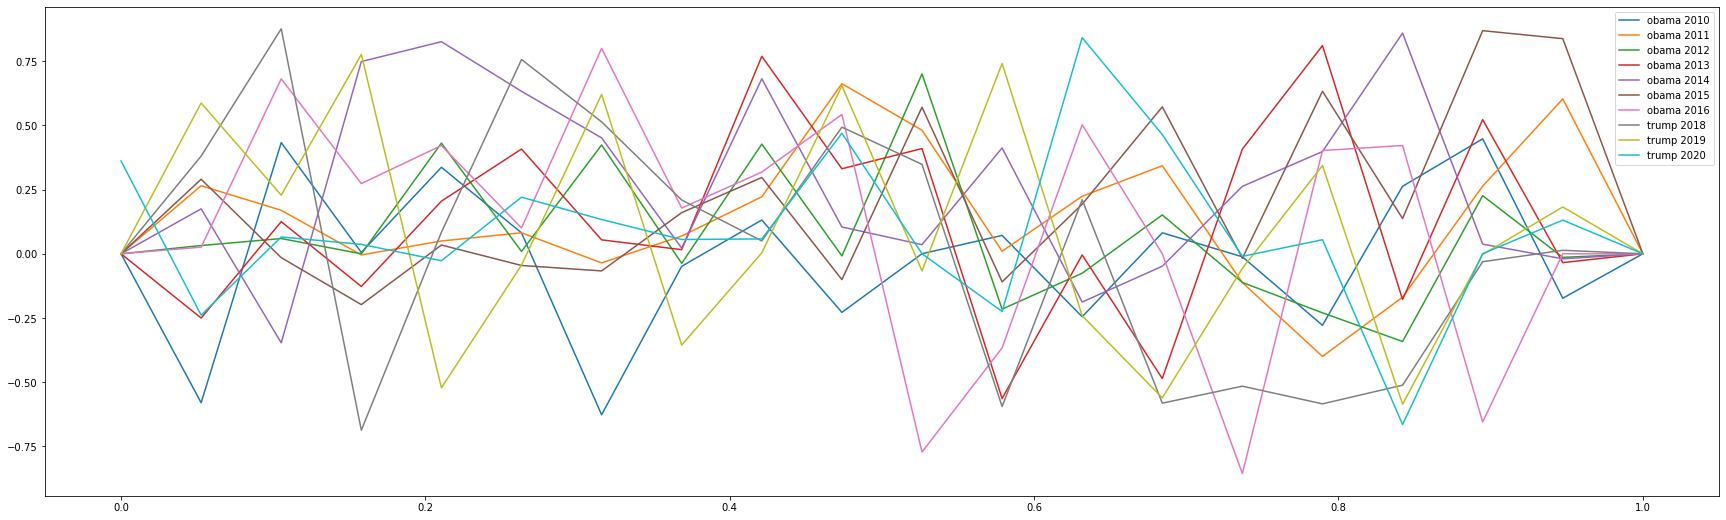

In [49]:
# Step 11: Plot the interpolated smooth curves of all speeches
plt.figure(figsize=(30, 9))
for i in range(0,10):
    x = u[i]['index']
    y = u[i]['compound']
    x_new = np.linspace(x.min(), x.max(),20)

    f = interp1d(x, y, kind='quadratic')
    y_smooth=f(x_new)

    plt.plot(x_new,y_smooth, label = r[0])
    plt.legend(['obama 2010', 'obama 2011', 'obama 2012', 'obama 2013', 'obama 2014', 'obama 2015', 'obama 2016', 'trump 2018', 'trump 2019', 'trump 2020'])

It's not to pretty to look at, but generally the sentiment scores oscillate throughout the speeches and the peaks and valleys happen around the same spots. See if you can spot them. 